## Chebyshev Polynomials

In the last section, we found that a set of nodes with points more densely spaced at the edges of the interval seemed to work much better for polynomial interpolation than equally spaced points.  It turns out, the points we choose were roots of a [Chebyshev polynomial](https://en.wikipedia.org/wiki/Chebyshev_polynomials).  Chebyshev polynomials are a set of orthogonal polynomials on the interval $[-1,1]$ with respect to the weight function $1/\sqrt{1-x^2}$.  They can be defined via trignometric functions as

```{math}
:label: chebdef
  T_k(x)=\cos(k \arccos x).
```  

Note that we will restrict $x$ to be in $[-1,1]$ here so $\arccos x$ remains well-defined.  It should be clear from the definition in terms of the cosine function that $T_k(x)$ satisfies



```{math}
:label: prop1
-1 \geq T_k(x) \geq 1 \quad \text{for}\quad -1\geq x \geq 1
```

and $T_k(x)$ has roots at $k \arccos x = (odd integer) \frac{\pi}{2}$ or  

```{math}
:label: prop2
x_j=\cos\left( \frac{(2j+1)\pi}{2k} \right),\qquad j=0,...,k-1 
```
 

and $T_k(x)$ oscillates between $-1$ and $1$ a total of $k+1$ times, hitting these extremes at  


```{math}
:label: prop3
  x=\cos 0, \cos(\pi/k), ...,\cos((k-1)\pi/k).
```



Note that these zeros correspond to the projection onto $x$ of points spaced at equally spaced angles on the unit circle.  What is perhaps less clear is that Eq.{eq}`chebdef` corresponds to a polynomial at all.
However, for $k=0$ and $1$ it is easy to see that

$$\begin{align}
T_0(x)&=\cos(0 \arccos x) = 1,\\
T_1(x)&=\cos(1 \arccos x) = x.
\end{align}
$$

To see that we get a polynomial for higher $k$ it is helpful to derive the recursion relation for the Chebyshev polynomials.  If we set $y=\arccos x$ we have  

$$\begin{align}
T_{k+1}(x)&=\cos\left( (k+1)y \right)= \cos(ky)\cos(y)-\sin(ky)\sin(y),\\
T_{k-1}(x)&=\cos\left( (k-1)y \right)= \cos(ky)\cos(y)+\sin(ky)\sin(y),
\end{align}$$

where we have used the trig-identies for the sum/difference of two angles.  Adding these equations gives  

$$T_{k+1}(x)+T_{k-1}(x)=2\cos(ky)\cos(y)=2T_k(x)T_1(x)=2 x\, T_k(x),$$  

making use of our previous expression that $T_1(x)=x$.  This can then be easily rearranged to give the recursion relation  

```{math}
:label: chebrecursion
T_{k+1}(x)=2 x\, T_k(x) - T_{k-1}(x).
```

As implied by the name, we can use this to recursively derive higher order polynomials given the two lower order ones.  Starting with the known $T_0(x)$ and $T_1(x)$ given above, this gives the next few polynomials as

$$\begin{align}
T_2(x)&= 2x^2-1,\\
T_3(x)&= 4x^3-3x,\\
T_4(x)&= 8x^4-8x^2+1.
\end{align}$$

From the pattern of these first few polynomials, and the multiplication by $2$ in the recursion it should also be clear that the leading coefficient (coefficient of the highest power of $x$) for $T_k(x)$ is $2^{k-1}$.  This, and the fact that we know the roots (in Equation {eq}`prop2`) implies that


```{math}
:label: Tnplus1
\frac{T_{n+1}(x)}{2^n}=(x-x_0)(x-x_1)...(x-x_n)=\prod_{j=0}^n (x-x_j),
```

where the $x_j$ are the roots of $T_{n+1}(x)$ from Equation {eq}`prop2`.

This now brings us back to the Error formula for polynomial interpolation that we derived in the previous section:

$$\begin{equation} f(x)-p_n(x) = \frac{f^{n+1}(\xi)}{(n+1)!}\prod_{j=0}^n (x-x_j). \end{equation}$$

*If* we select our interpolation nodes as the roots of $T_{n+1}(x)$, namely  

$$ x_i=\cos\left( \frac{(2i+1)\pi}{2n+2} \right), \qquad\qquad i=0, 1, ..., n. $$

then we see that we can substitute {eq}`Tnplus1` into the error formula to get  

$$\begin{equation} f(x)-p_n(x) = \frac{f^{n+1}(\xi)}{(n+1)!}\frac{T_{n+1}}{2^n},\end{equation}$$

so that

$$\begin{align} |f(x)-p_n(x)| &= \left|\frac{f^{n+1}(\xi)}{(n+1)!}\frac{T_{n+1}}{2^n}\right|,\\ &\leq \frac{|f^{n+1}(\xi)|}{(n+1)!2^n}.\end{align} $$

In fact, we can also show that *this is the best* we can do.

Again, we show this by first assuming the contrary and then showing that this leads to a contradiction.  In order for this to be the best choice, we must have $T_{n+1}(x)/2^n$ to be the monic polynomial (a polynomial with leading coefficient 1) with the smallest absolute maximum.  Suppose this is nto the case.  Then there must be another monic polynomial, say $Q_{n+1}(x)$ of degree $n$ with an even smaller absolute max on $[-1,1]$.  i.e.  

$$ |Q_{n+1}(x)| < \frac{1}{2^n}$$ 

for $x\in [-1,1]$.

Since $T_{n+1}(x)$ alternates between $-1$ and $1$ a total of $n+2$ times (as noted in {eq}`prop3`), at these $n+2$ points the polynomial  

$$Q_{n+1}(x)-\frac{T_{n+1}(x)}{2^n}$$

is alternatively positive and negative (because $Q_{n+1}$ is always less than $1/2^n$) at these extreme points for $T_{n+1}(x)$.  The intermediate value theorem then implies that $Q_{n+1}-\frac{T_{n+1}}{2^n}$ must cross zero at least $n+1$ times so it has $n+1$ roots.  This is a contradition as both $Q_{n+1}$ and $\frac{T_{n+1}}{2^n}(x)$ are monic so the leading term cancels in subtraction and therefore $Q_{n+1}-\frac{T_{n+1}}{2^n}$ has degree less than or equal to $n$ and so has at most $n$ zeros.

So, in summary,

- If you want to use polynomial interpolation to approximate a function on $[-1,1]$, select Chebyshev points as your interpolation nodes.

- When you do this, you can also bound the error if you can also bound $|f^{n+1}(\xi)|$.

Chebyshev points are in $[-1,1]$ but you should keep in mind that any interval $x \in [a,b]$ can be easily mapped into $y\in [-1,1]$ via a linear transformation

$$ x = \frac{b-a}{2}y+\frac{b+a}{2}. $$

Constructing the polynomial interpolation for $y$ can then be done using Chebyshev points.

We illustrate these points with an example below.

### Example. 

Let's construct a fourth order polynomial intepolation ($n=4$) for $f(x)=e^{-x^2}$ on the interval $[0,1]$.

We first need to map this interval onto $[-1,1]$ using the change of variables

$$ x = \frac{1}{2}(y+1).$$

We then select our Chebyshev points as  

$$y_0 = \cos\frac{\pi}{10},\,y_1=\cos \frac{3\pi}{10}\,y_1=\cos \frac{5\pi}{10}\,y_1=\cos \frac{7\pi}{10}\,y_1=\cos \frac{9\pi}{10}.$$

and construct $p_4(y)$ for $f(y)=e^{-(y+1)^2/4}$ using the standard barycentric Lagrange interpolation routine.  

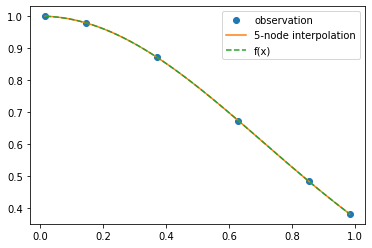

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import barycentric_interpolate
n = 5
x_observed = np.cos((2.*np.arange(0,n+1,1)+1.)*math.pi/(2.*n+2))
y_observed = np.exp(-(x_observed+1.)**2/4)
x = np.linspace(min(x_observed), max(x_observed), num=100)
y = barycentric_interpolate(x_observed, y_observed, x)
y_actual = np.exp(-(x+1.)**2/4)
plt.plot((x_observed+1)/2, y_observed, "o", label="observation")
plt.plot((x+1)/2, y, label="5-node interpolation")
plt.plot((x+1)/2, y_actual, label="f(x)",linestyle='dashed')
plt.legend()
plt.show()

We can also construct an error bound.  The fifth derivative with respect to $x$ is $d^5 f(x)/dx^5=(-120x+160x^3-32x^5)e^{-x^2}$.  A quick plot (not shown, you can do this yourself) of this on the interval $[0,1]$ easily shows that $|d^5 f(x)/dx^5| < 33$.  As we are doing the interpolation along the transformed variable $y$ rather than $x$, to use the error formula we actually also need  

$$\frac{df}{dy} = \frac{df}{dx} \frac{dx}{dy} = \frac{1}{2} \frac{df}{dx}.$$ 

Putting this all together gives  

$$|f(y)-p_n(y)| \leq \frac{|f^{n+1}(\xi)|}{(n+1)!2^n} \leq \frac{33/2^5}{5!2^4} = 5\times 10^{-5}.$$  

In this case we can also work out the actual error:

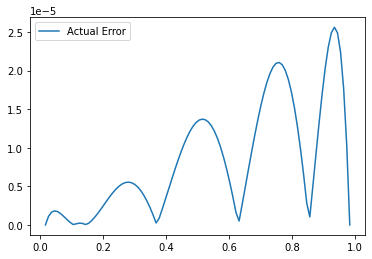

In [2]:
plt.plot((x+1)/2, np.abs(y-y_actual),label="Actual Error")
plt.legend()
plt.show()

The largest actual error is about 1/2 our error bound so the bound slightly overestimates the error (but that is generally what you expect for a *bound*). 